# Recurrent Neural Network

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
import seaborn as sns
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout

### Importing the training set

In [49]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [50]:
data = dataset_train.copy()
data = pd.DataFrame(data)
data.corr()

/tmp/ipykernel_197896/3455477308.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low
Open,1.000000,0.999692,0.999498
High,0.999692,1.000000,0.999480
Low,0.999498,0.999480,1.000000


/tmp/ipykernel_197896/1531484987.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre_mat = data.corr()


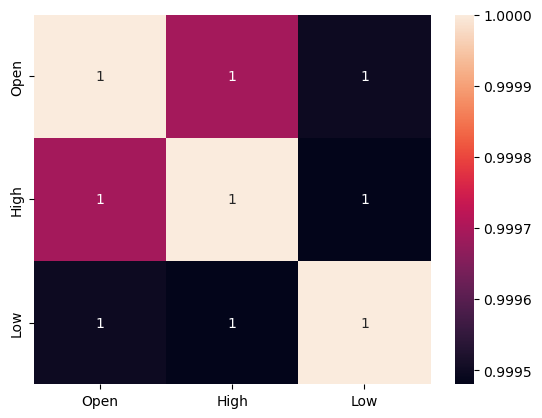

In [51]:
corre_mat = data.corr()
sns.heatmap(corre_mat, annot= True)
plt.show()

### Feature Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [26]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


### Reshaping

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Initialising the RNN

In [30]:
regressor = Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=False),  # Last layer doesn't return sequences
    tf.keras.layers.Dense(1)
])

In [31]:
# regressor.add(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))
# regressor.add(Dropout(0.2))

In [32]:
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

In [33]:
# regressor.add(LSTM(units = 50, return_sequences = True))
# regressor.add(Dropout(0.2))

In [35]:
# regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

In [36]:
# regressor.add(Dense(units = 1))

### Compiling the RNN

In [37]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [38]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 16ms/step - loss: 0.0305
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 6.9971e-04
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: 5.7968e-04
Epoch 4/100
38/38 [==============================] - 1s 16ms/step - loss: 5.1802e-04
Epoch 5/100
38/38 [==============================] - 1s 16ms/step - loss: 4.4292e-04
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 4.7770e-04
Epoch 7/100
38/38 [==============================] - 1s 15ms/step - loss: 4.7161e-04
Epoch 8/100
38/38 [==============================] - 1s 16ms/step - loss: 4.0995e-04
Epoch 9/100
38/38 [==============================] - 1s 16ms/step - loss: 3.6175e-04
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 3.9176e-04
Epoch 11/100
38/38 [==============================] - 1s 15ms/step - loss: 5.0469e-04
Epoch 12/100
38/38 [==============================] - 1s 15ms/step 

38/38 [==============================] - 1s 16ms/step - loss: 3.1336e-04
Epoch 97/100
38/38 [==============================] - 1s 17ms/step - loss: 2.8291e-04
Epoch 98/100
38/38 [==============================] - 1s 16ms/step - loss: 2.9527e-04
Epoch 99/100
38/38 [==============================] - 1s 17ms/step - loss: 3.2137e-04
Epoch 100/100
38/38 [==============================] - 1s 16ms/step - loss: 3.4235e-04


## Part 3 - Making the predictions and visualising the results

In [39]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [40]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# print(len(dataset_total))
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(len(inputs))
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

80
1/1 [==============================] - 0s 226ms/step


### Visualising the results

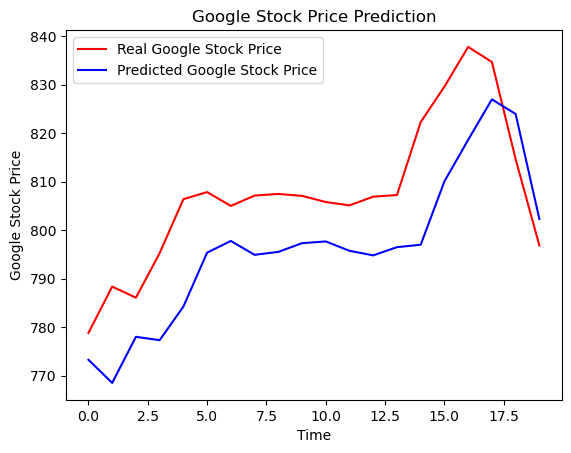

In [41]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()